In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris


In [3]:


data = load_iris()
X, y = data.data, data.target


In [4]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)



RandomForestClassifier(oob_score=True, random_state=42)

In [5]:

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
oob_score = rf.oob_score_


In [6]:

print(f"OOB Score: {oob_score:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


OOB Score: 0.9167
Test Accuracy: 1.0000


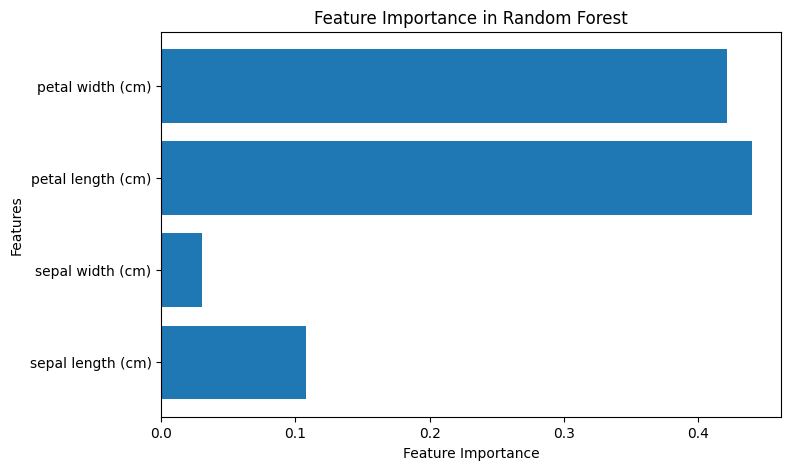

In [7]:


plt.figure(figsize=(8, 5))
plt.barh(data.feature_names, rf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()


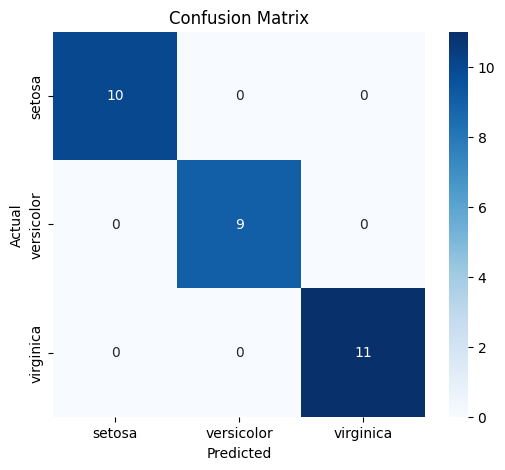

In [8]:


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [9]:


oob_errors = []
for i in range(10, 200, 10):
    rf_temp = RandomForestClassifier(n_estimators=i, oob_score=True, random_state=42)
    rf_temp.fit(X_train, y_train)
    oob_errors.append(1 - rf_temp.oob_score_)



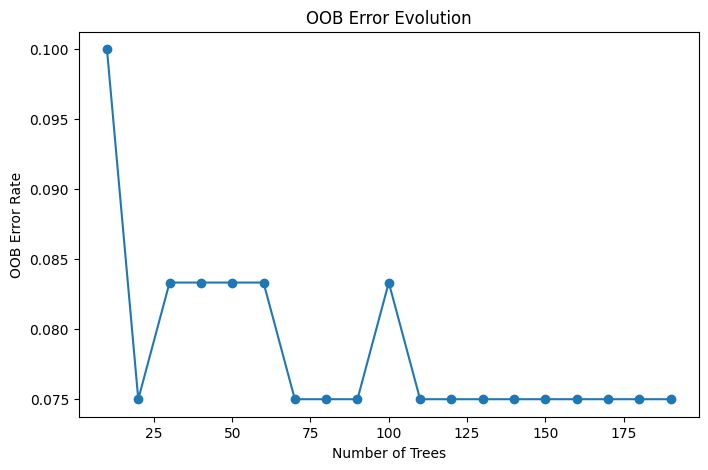

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(range(10, 200, 10), oob_errors, marker="o")
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error Rate")
plt.title("OOB Error Evolution")
plt.show()